<a href="https://colab.research.google.com/github/Sudhakathir16/sql-asignment/blob/main/NLP_MY_PROJECT_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import pandas as pd

In [54]:
import csv
import pandas as pd

df = []
skipped_lines = []
with open("/content/IMDB_Dataset_sky.csv", 'r') as f:
    reader = csv.reader(f)
    for i, row in enumerate(reader):
        try:
            # Assuming the CSV has two columns: text and label
            df.append(row)
        except Exception as e:
            print(f"Error reading line {i+1}: {e}")
            skipped_lines.append(i+1)
# Convert the list of lists to a pandas DataFrame
# Assuming the CSV has two columns, name them appropriately
if df:
    df = pd.DataFrame(df)
    display(df.head())
else:
    print("No data was successfully read from the file.")

if skipped_lines:
    print(f"\nSkipped {len(skipped_lines)} lines due to errors: {skipped_lines[:10]}...") # Print first 10 skipped lines

,0,1
0,review,sentiment
1,One of the other reviewers has mentioned that ...,positive
2,A wonderful little production. <br /><br />The...,positive
3,I thought this was a wonderful way to spend ti...,positive
4,Basically there's a family where a little boy ...,negative


In [55]:
df

,0,1
0,review,sentiment
1,One of the other reviewers has mentioned that ...,positive
2,A wonderful little production. <br /><br />The...,positive
3,I thought this was a wonderful way to spend ti...,positive
4,Basically there's a family where a little boy ...,negative
...,...,...
49996,I thought this movie did a down right good job...,positive
49997,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49998,I am a Catholic taught in parochial elementary...,negative
49999,I'm going to have to disagree with the previou...,negative


In [56]:
df = pd.read_csv("/content/IMDB_Dataset_sky.csv")
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [57]:
# Install required libraries (run this once in Colab)
!pip install nltk wordcloud contractions beautifulsoup4 -q

print("✅ Libraries installed successfully!")

✅ Libraries installed successfully!


In [58]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from  sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [59]:
df.shape

(50000, 2)

In [60]:
df['Category']=df['sentiment'].apply(lambda x: 1 if x=='positive' else 0 )

In [61]:
df.sample(10)

,review,sentiment,Category
40265,This movie is not very bad tjough. But one can...,negative,0
49021,...I can't believe there are actually people h...,negative,0
21826,Why me? Why should I be subjected to such slau...,negative,0
42890,I guess this is the first movie that made me a...,positive,1
13046,"My age: 13<br /><br />Keats, played by Damon W...",negative,0
38196,Frequently voted China's greatest film ever by...,negative,0
7903,This is one of the worst films I have seen in ...,negative,0
36845,"Gorgeous Barbara Bach plays Jennifer Fast, a t...",positive,1
7027,Spirit is a unique and original look at wester...,positive,1
9503,This is one of those star-filled over-the-top ...,negative,0


In [62]:
df['Category'].value_counts()

,count
Category,
1,25000
0,25000


In [63]:
# For text processing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer

In [64]:
# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [65]:
# Download NLTK data
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)
nltk.download('omw-1.4', quiet=True)


True

In [66]:
print("✅ All libraries imported successfully!")
print("📊 Pandas version:", pd.__version__)
print("🔤 NLTK version:", nltk.__version__)

✅ All libraries imported successfully!
📊 Pandas version: 2.2.2
🔤 NLTK version: 3.9.1


In [67]:
# Download required NLTK data first
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [68]:
# Display a sample review with common issues
sample_index = 0
sample_review = df.loc[sample_index, 'review']

print("🎬 Sample Raw Review:")
print("="*80)
print(sample_review[:500] + "..." if len(sample_review) > 500 else sample_review)
print("\n📊 Characteristics:")

🎬 Sample Raw Review:
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ...

📊 Characteristics:


In [69]:
def remove_stopwords(text):
    """Remove stopwords from text"""
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    return ' '.join(filtered_text)
# Example
text_with_stopwords = "the movie was very good and i would watch it again"
text_without_stopwords = remove_stopwords(text_with_stopwords)

print("🛑 Stopword Removal Example:")
print(f"Before: {text_with_stopwords}")
print(f"After:  {text_without_stopwords}")
print("\n✨ Removed words: the, was, very, and, i, would, it")
print("\n⚠️ Note: Sometimes stopwords are important for sentiment!")
print("   Example: 'not good' → 'good' (meaning reversed!)")

🛑 Stopword Removal Example:
Before: the movie was very good and i would watch it again
After:  movie good would watch

✨ Removed words: the, was, very, and, i, would, it

⚠️ Note: Sometimes stopwords are important for sentiment!
   Example: 'not good' → 'good' (meaning reversed!)


In [70]:
def lemmatize_text(text):
    """Lemmatize words in text"""
    lemmatizer = WordNetLemmatizer()
    word_tokens = word_tokenize(text)
    lemmatized = [lemmatizer.lemmatize(word) for word in word_tokens]
    return ' '.join(lemmatized)

# Example
text_to_lemmatize = "the movies were running beautifully"
lemmatized_text = lemmatize_text(text_to_lemmatize)
print("🌱 Lemmatization Example:")
print(f"Before: {text_to_lemmatize}")
print(f"After:  {lemmatized_text}")
print("\n✨ Transformations:")
print("   • movies → movie")
print("   • running → running (context needed for verb)")
print("   • beautifully → beautifully")

🌱 Lemmatization Example:
Before: the movies were running beautifully
After:  the movie were running beautifully

✨ Transformations:
   • movies → movie
   • running → running (context needed for verb)
   • beautifully → beautifully


In [71]:
X=df['review']
y=df['Category']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [72]:
X_train.shape

(40000,)

In [73]:
X_test.shape

(10000,)

In [74]:
X_train[:4]

,review
43795,"A sadly inferior precursor to ""Who's Afraid of..."
10235,This film has me seriously doubting again whet...
44088,I watched this movie a couple of weeks ago and...
28832,There's a legion of Mick Garris haters out the...


In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

df = pd.read_csv("/content/IMDB_Dataset_sky.csv")
df['Category']=df['sentiment'].apply(lambda x: 1 if x=='positive' else 0 )
X=df['review']
y=df['Category']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

cv=CountVectorizer()
X_train_cv=cv.fit_transform(X_train.values)
X_train_cv[:1]

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 75 stored elements and shape (1, 92967)>

In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

df = pd.read_csv("/content/IMDB_Dataset_sky.csv")
df['Category']=df['sentiment'].apply(lambda x: 1 if x=='positive' else 0 )
X=df['review']
y=df['Category']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

cv=CountVectorizer()
X_train_cv=cv.fit_transform(X_train.values)

In [77]:
X_train_cv.shape

(40000, 93060)

In [78]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=50,criterion="entropy",random_state=42)
rf.fit(X_train_cv,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=42)

In [79]:
X_test_cv =cv.transform(X_test)

In [80]:
y_pred=rf.predict(X_test_cv)

In [81]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      5009
           1       0.84      0.84      0.84      4991

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



In [82]:
new_sentences = [
    "I really enjoyed this movie!",  # positive
    "This was the worst experience ever."  # negative
]

In [83]:
review_count=cv.transform(new_sentences)
rf.predict(review_count)

array([0, 0])

In [84]:
##Train the model using sklearn pipeline and reduce number of lines of code
clf=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('rf',RandomForestClassifier())
])

In [85]:
clf.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('rf', RandomForestClassifier())])

In [86]:
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      5009
           1       0.86      0.86      0.86      4991

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [87]:
##Fit other Model And Compare accuracy¶
##Multinomial Naive Bayes
clf = Pipeline([

     ('vectorizer', CountVectorizer()),
      ('Multi NB', MultinomialNB())

])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.84      0.88      0.86      5009
           1       0.87      0.83      0.85      4991

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [88]:
##KNN
clf = Pipeline([

     ('vectorizer', CountVectorizer()),
      ('KNN', (KNeighborsClassifier(n_neighbors=10, metric = 'euclidean')))   #using the KNN classifier with 10 neighbors
])


clf.fit(X_train, y_train)



y_pred = clf.predict(X_test)


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.67      0.66      5009
           1       0.66      0.64      0.65      4991

    accuracy                           0.66     10000
   macro avg       0.66      0.66      0.66     10000
weighted avg       0.66      0.66      0.66     10000



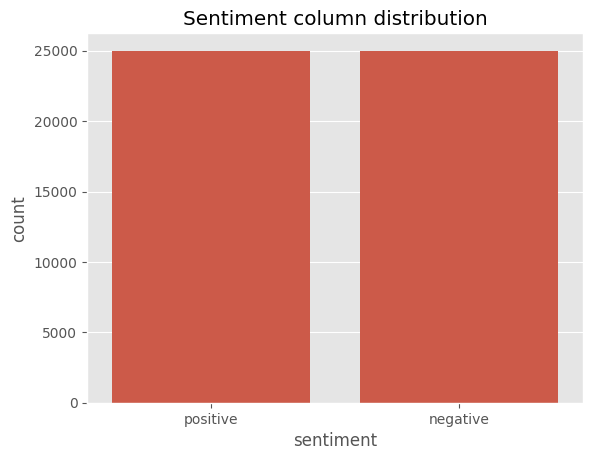

In [89]:
plt.style.use("ggplot")
sns.countplot(data = df, x = df["sentiment"])
plt.title('Sentiment column distribution')
plt.show()